In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import jointplot
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv("C:/Users/Admin/Desktop/PYTHON/Widhya/Bitcoin pridiction/bitcoin_dataset(1)(1).csv")

# convert date column as index
#data.set_index('Date', inplace=True)
data.head(5)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
# find the 1024th value in the btc_market_price column
data.btc_market_price[1023]

13.6888

In [15]:
#data.info()

C:\Users\Admin\Desktop\New folder\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


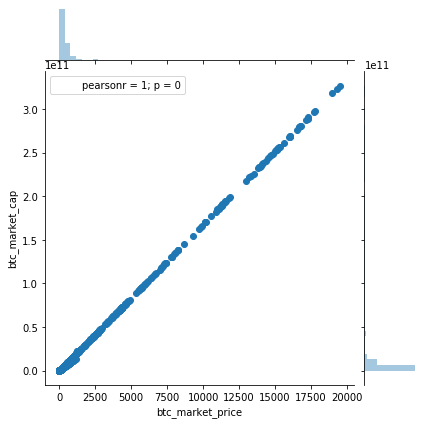

In [5]:
# finding perfect correlation between btc_market_price with other variables
# pearsonr =1 for perfect correlation

jointplot1 = sns.jointplot(data=data, x='btc_market_price',y='btc_market_cap', kind='scatter')
jointplot1.annotate(stats.pearsonr)
plt.show()

In [6]:
# replacing all NAN values with mean
# data.fillna(0) --> other way
# data.apply(lambda x: x.fillna(x.mean()),axis=0) --> another way
#data['btc_avg_block_size'].dropna().plot(marker='o', ls = '');
#data.dropna()
data.fillna(data.mean(),inplace = True)
data.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [14]:
#data.info()

In [8]:
# convert date column into numerical as LR doesn't work on dates
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])
data['Date']=data['Date'].map(dt.datetime.toordinal)

In [9]:
# Linear regression

X = data.drop('btc_market_price', axis=1)
#X = X.to_numpy()
y = data.btc_market_price  
#y = y.to_numpy()

X_train, X_test, y_train, y_test =train_test_split(X, y, train_size = 0.8, random_state = 100)

model = LinearRegression()  #create linear regression object
model.fit(X_train,y_train)  #train model on train data
model.score(X_train, y_train) #check score

0.99993346241023

In [10]:

print ("Coefficient: \n", model.coef_)  # beta coefficient same orderas passed
print ("Intercept: \n", model.intercept_) # y intercept
coefs = zip(model.coef_, X.columns)
model.__dict__
print ("sl = %.1f + " % model.intercept_ + \
     " + ".join("%.1f %s" % coef for coef in coefs)) #linear model

Coefficient: 
 [ 1.06205510e-02 -2.66927515e-06  5.82186376e-08 -4.11806482e-09
 -2.31064162e-04 -4.14500474e+01 -1.55427761e-01 -2.92021203e-02
  1.08481032e+00 -1.87880013e-05  3.46114750e-11 -1.13574350e-06
 -6.76442294e-02  1.61285581e-04  3.55173437e+00  1.12822444e-04
  4.16453374e-04  4.83905861e-07 -3.00685885e-04  1.30153741e-04
 -4.67464739e-07 -2.52589875e-06  2.86749671e-08]
Intercept: 
 -7796.594710662589
sl = -7796.6 + 0.0 Date + -0.0 btc_total_bitcoins + 0.0 btc_market_cap + -0.0 btc_trade_volume + -0.0 btc_blocks_size + -41.5 btc_avg_block_size + -0.2 btc_n_orphaned_blocks + -0.0 btc_n_transactions_per_block + 1.1 btc_median_confirmation_time + -0.0 btc_hash_rate + 0.0 btc_difficulty + -0.0 btc_miners_revenue + -0.1 btc_transaction_fees + 0.0 btc_cost_per_transaction_percent + 3.6 btc_cost_per_transaction + 0.0 btc_n_unique_addresses + 0.0 btc_n_transactions + 0.0 btc_n_transactions_total + -0.0 btc_n_transactions_excluding_popular + 0.0 btc_n_transactions_excluding_cha

In [11]:
# Making predictions based on model

y_pred = model.predict(X_test) # Returns results of y predictions given X data in X_test

In [12]:
# Model Evaluation

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# print result of MSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

12.043267433128332
327.1200017319732
18.08645907113864
